In [1]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
import ast

In [3]:
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("/content/drive/MyDrive/NLP_FIN/NLP_recomm/data.csv")
genre_data = pd.read_csv('/content/drive/MyDrive/NLP_FIN/NLP_recomm/data_by_genres.csv')
year_data = pd.read_csv('/content/drive/MyDrive/NLP_FIN/NLP_recomm/data_by_year.csv')

In [5]:
data.drop_duplicates(inplace = True, subset = ['name'])

In [6]:
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.21100,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.34100,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.16600,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.30900,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.19300,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170646,0.5220,2020,0.204,['Gunna'],0.598,230600,0.47200,1,2f8y4CuG57UJEmkG3ujd0D,0.000015,0,0.108,-10.991,1,NASTY GIRL / ON CAMERA,66,2020-05-22,0.2580,120.080
170647,0.0838,2020,0.974,['Najma Wallin'],0.175,133500,0.00759,0,6RuFOroO9VO0aMGEzirLHk,0.925000,7,0.113,-35.072,1,Med slutna ögon,70,2020-02-21,0.0454,70.872
170649,0.7340,2020,0.206,['Ashnikko'],0.717,150654,0.75300,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.101,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.101,['MAMAMOO'],0.634,211280,0.85800,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.258,-2.226,0,AYA,76,2020-11-03,0.0809,91.688


In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [8]:
data = data.drop(labels=['year', 'acousticness', 'loudness'], axis = 1)

<Axes: >

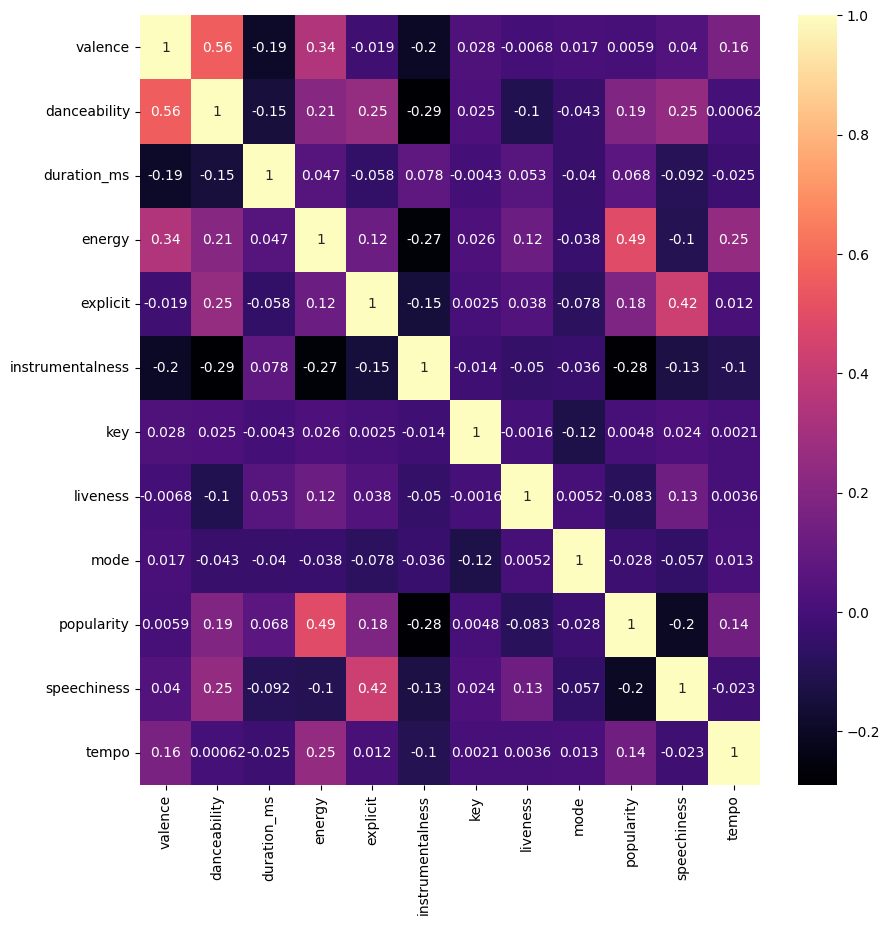

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), cmap='magma', annot=True)

In [10]:
name = data['name']
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [11]:
col = ['danceability', 'energy', 'valence']
X=MinMaxScaler().fit_transform(data[col])
kmeans = KMeans(init='k-means++', n_clusters = 10, random_state = 420).fit(X)

In [12]:
data['kmeans'] = kmeans.labels_
data['song_name'] = name

In [13]:
cluster = data.groupby(by=data['kmeans'])

In [14]:
y=data.pop('kmeans')
x=data[col]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [16]:
x_train

,danceability,energy,valence
120618,0.315,0.780000,0.173
115267,0.492,0.189000,0.641
121494,0.639,0.549000,0.525
65655,0.475,0.934000,0.771
123985,0.158,0.000996,0.073
...,...,...,...
133854,0.413,0.503000,0.311
5614,0.598,0.428000,0.964
135266,0.383,0.737000,0.334
7949,0.309,0.054800,0.167


In [17]:
from lightgbm import LGBMClassifier
model=LGBMClassifier().fit(x_train,y_train)

In [18]:
model.score(x_test, y_test)

0.9880649506135888

In [19]:
df=cluster.apply(lambda x: x.sort_values(["popularity"],ascending=False))
df.reset_index(level=0, inplace=True)

In [20]:
df

,kmeans,valence,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,mode,name,popularity,release_date,speechiness,tempo,song_name
19620,0,0.0927,"['Justin Bieber', 'benny blanco']",0.631,149297,0.239,1,4y4spB9m0Q6026KfkAvy9Q,0.000000,11,0.1160,0,Lonely (with benny blanco),95,2020-10-16,0.0398,79.859,Lonely (with benny blanco)
19442,0,0.3270,['Ariana Grande'],0.778,178627,0.317,1,6ocbgoVGwYJhOv1GgI9NsF,0.000000,1,0.0881,0,7 rings,87,2019-02-08,0.3340,140.048,7 rings
19678,0,0.2290,"['DJ Khaled', 'Drake']",0.695,218902,0.343,1,35RJhm1pEovTBwnNR0zWad,0.000001,5,0.1070,1,GREECE (feat. Drake),87,2020-07-16,0.0432,85.840,GREECE (feat. Drake)
19427,0,0.2430,['Billie Eilish'],0.704,245426,0.225,0,3ZCTVFBt2Brf31RLEnCkWJ,0.657000,6,0.1060,0,everything i wanted,87,2019-11-13,0.0994,120.006,everything i wanted
18208,0,0.3310,['John Legend'],0.422,269560,0.264,0,3U4isOIWM3VvDubwSI3y7a,0.000000,8,0.1320,1,All of Me,86,2013-08-30,0.0322,119.930,All of Me
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124567,9,0.2740,['Crystal Mad'],0.431,195097,0.972,1,6eiGPj4ERFAKPzYWZ8CrIN,0.000000,7,0.2540,1,Settle The Score,0,2019-12-23,0.1270,155.036,Settle The Score
124561,9,0.2550,"['Broken Element', 'Last Word']",0.507,217600,0.949,0,6EbCBaB9SRjqyB0MtkX2jV,0.000600,9,0.3090,0,Rebels Till The End,0,2019-12-27,0.1080,149.995,Rebels Till The End
124560,9,0.0166,['Bird Sounds'],0.256,125382,0.989,0,5SVjo1VuYhamq77F9dEjFY,0.813000,6,0.9650,0,Feathered Birds,0,2019-02-07,0.0448,92.275,Feathered Birds
124558,9,0.0844,['Bird Sounds'],0.399,160698,0.943,0,5Bi4BPnBJMHNpM7DSdKq8C,0.860000,6,0.8100,0,Tweeting Relaxation,0,2019-02-07,0.6700,142.240,Tweeting Relaxation


In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = genre_data[col]
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)


In [22]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2
                                                                      , verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.003s...
[t-SNE] Computed neighbors for 2973 samples in 0.081s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.216913
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.054756
[t-SNE] KL divergence after 1000 iterations: 0.963077


In [24]:
data_test = pd.read_csv('/content/drive/MyDrive/NLP_FIN/NLP_recomm/my_DEV')
data_test_uri = pd.read_csv('/content/drive/MyDrive/NLP_FIN/NLP_recomm/fin_uris')
data_test_v = data_test.iloc[:, 1:4].values

In [25]:
data_test_uri = data_test_uri.drop('Unnamed: 0', axis = 1)

In [26]:
data_test['cluster'] = cluster_pipeline.predict(data_test_v)

In [27]:
data_test['uris'] = data_test_uri.iloc[:, :].values

In [28]:
data_fin = data_test.iloc[:, 4: 6].values

In [ ]:
data_fin

In [31]:
np.unique(data_test['cluster'], return_counts= True)

(array([0, 1, 2, 4, 6, 7, 8], dtype=int32),
 array([ 2,  3, 10, 11,  3, 15,  6]))

In [56]:
df = pd.read_csv('/content/drive/MyDrive/NLP_FIN/NLP_recomm/top_50')

In [57]:
for i in df.columns: 
  for j in range(len(df[i])):
    df[i][j] = np.asarray(ast.literal_eval(df[i][j]))

In [60]:
df_a = []

In [65]:
df.iloc[:, 0].values

array([array([0.843, 0.408, 0.189]), array([0.276, 0.639, 0.643]),
       array([0.589, 0.914, 0.512]), array([0.563, 0.442, 0.189]),
       array([0.84 , 0.789, 0.687]), array([0.627, 0.855, 0.338]),
       array([0.757, 0.708, 0.387]), array([0.337, 0.759, 0.61 ]),
       array([0.723, 0.949, 0.424]), array([0.768, 0.767, 0.457]),
       array([0.668, 0.743, 0.235]), array([0.668, 0.743, 0.235]),
       array([0.385, 0.259, 0.134]), array([0.693, 0.84 , 0.91 ]),
       array([0.522, 0.882, 0.369]), array([0.362, 0.987, 0.52 ]),
       array([0.579, 0.925, 0.66 ]), array([0.557, 0.699, 0.887]),
       array([0.63 , 0.936, 0.733]), array([0.318, 0.984, 0.716]),
       array([0.725, 0.737, 0.219]), array([0.592, 0.861, 0.794]),
       array([0.646, 0.859, 0.628]), array([0.575, 0.88 , 0.425]),
       array([0.862, 0.642, 0.765]), array([0.705, 0.684, 0.246]),
       array([0.752, 0.862, 0.722]), array([0.573, 0.724, 0.441]),
       array([0.757, 0.617, 0.803]), array([0.796, 0.878, 0.79

In [85]:
df_a = df.iloc[:, 0].values

In [86]:
df_a = np.stack(df_a)

In [87]:
df_a[0]

array([0.843, 0.408, 0.189])

In [88]:
trial = []

In [89]:
for i in df_a:
   trial.append(np.vstack(i))

In [90]:
trial = np.array(trial)

In [91]:
fin = trial.reshape(50,3)

In [92]:
got_a = cluster_pipeline.predict(fin)

In [93]:
np.unique(got_a, return_counts=True)

(array([1, 2, 3, 4, 5, 7, 8, 9], dtype=int32),
 array([ 7, 10,  1,  4,  4, 14,  1,  9]))